In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
# get the dataframes we are going to use 

# this is the temperature data
weather = pd.read_csv('C:\\Users\\fderango\\Downloads\\Milestone 1 Dataset\\hr_temp.csv')
#temp.head()
weather.tail()

,STATION,DATE,REPORT_TYPE,SOURCE,HourlyDryBulbTemperature
26275,72520514762,2020-01-31T19:53:00,FM-15,7,34.0
26276,72520514762,2020-01-31T20:53:00,FM-15,7,33.0
26277,72520514762,2020-01-31T21:53:00,FM-15,7,33.0
26278,72520514762,2020-01-31T22:53:00,FM-15,7,33.0
26279,72520514762,2020-01-31T23:53:00,FM-15,7,34.0


In [3]:
# this is the second dataframe to use 
# this is the megawatt data 
energy = pd.read_csv('C:\\Users\\fderango\\Downloads\\Milestone 1 Dataset\\hrl_load.csv')
#load.head()
energy.head()

,datetime_beginning_utc,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,is_verified
0,2/1/2017 5:00,2/1/2017 0:00,RFC,WEST,DUQ,DUQ,1419.881,True
1,2/1/2017 6:00,2/1/2017 1:00,RFC,WEST,DUQ,DUQ,1379.505,True
2,2/1/2017 7:00,2/1/2017 2:00,RFC,WEST,DUQ,DUQ,1366.106,True
3,2/1/2017 8:00,2/1/2017 3:00,RFC,WEST,DUQ,DUQ,1364.453,True
4,2/1/2017 9:00,2/1/2017 4:00,RFC,WEST,DUQ,DUQ,1391.265,True


In [4]:
# make a new dataframe from the two dataframes we have 
# make a dictionary first than make the new dataframe  


df = {'Date': weather['DATE'],'mw': energy['mw'], 'Temp': weather['HourlyDryBulbTemperature']}

#this is what we want from both dataframes 
new_df = pd.DataFrame(data=df)
#new_df.head()

In [5]:
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df.dtypes

Date    datetime64[ns]
mw             float64
Temp           float64
dtype: object

In [6]:
new_df['year'] = new_df['Date'].dt.year
new_df['month'] = new_df['Date'].dt.month
new_df['day_of_week'] = new_df['Date'].dt.dayofweek
new_df['hour_of_day'] = new_df['Date'].dt.hour

In [7]:
new_df = new_df.set_index('Date')
new_df

,mw,Temp,year,month,day_of_week,hour_of_day
Date,,,,,,
2017-02-01 00:53:00,1419.881,37.0,2017,2,2,0
2017-02-01 01:53:00,1379.505,37.0,2017,2,2,1
2017-02-01 02:53:00,1366.106,36.0,2017,2,2,2
2017-02-01 03:53:00,1364.453,36.0,2017,2,2,3
2017-02-01 04:53:00,1391.265,36.0,2017,2,2,4
...,...,...,...,...,...,...
2020-01-31 19:53:00,1618.484,34.0,2020,1,4,19
2020-01-31 20:53:00,1580.925,33.0,2020,1,4,20
2020-01-31 21:53:00,1545.354,33.0,2020,1,4,21


In [8]:
new_df['Temp'] = new_df['Temp'].interpolate(method='linear')

In [9]:
train = new_df.loc['2017-02-01': '2019-12-31']
test = new_df.loc['2020-01-01': '2020-01-31']

This will start milestone#2
questions 

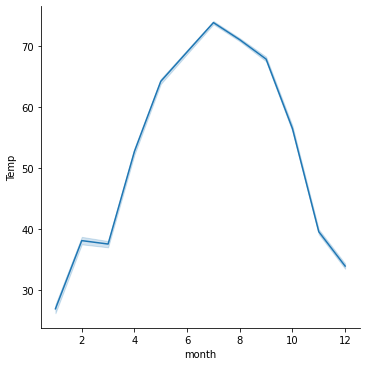

In [10]:
#Question 1 plot the training data over time 

#train.head()

# this is line plot between month and temp to see what the hourly temp during the year   
sns.relplot(x='month', y='Temp', kind='line', data=train) 

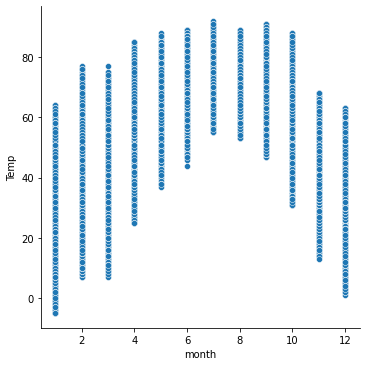

In [11]:
# this is a scatterplot 
scatplot = sns.relplot(x="month", y="Temp", data=train)
scatplot

<AxesSubplot:xlabel='month', ylabel='Temp'>

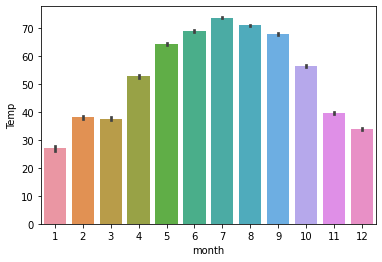

In [12]:
# this is bar plot of year to see any patterns  
sns.barplot(x='month', y='Temp', data=train)

<AxesSubplot:xlabel='hour_of_day', ylabel='mw'>

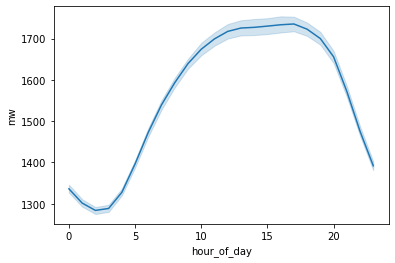

In [13]:
#Question #2 plot one week of the train weeks 

# this is a line plot of enegy and hour of the day 
sns.lineplot(x='hour_of_day', y='mw', data=train) 

<AxesSubplot:xlabel='day_of_week', ylabel='mw'>

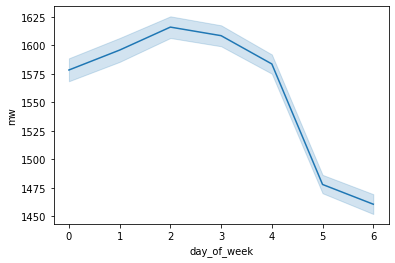

In [14]:
# line plot of energy and day of the week 
sns.lineplot(x='day_of_week', y='mw', data=train)

<AxesSubplot:xlabel='day_of_week', ylabel='mw'>

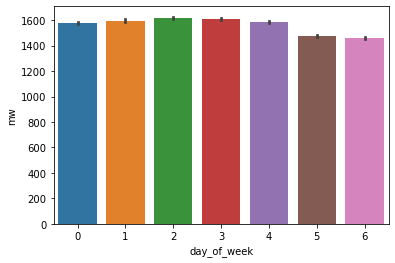

In [15]:
# make a barplot of the energy and day of the week
sns.barplot(x='day_of_week', y='mw', data=train)

<AxesSubplot:xlabel='hour_of_day', ylabel='mw'>

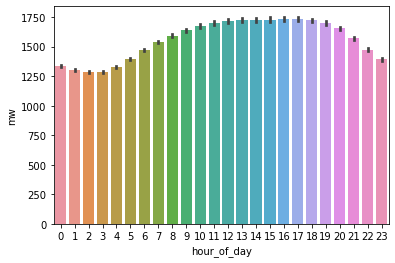

In [16]:
# make a bar plot of the energy and hour of the day 
sns.barplot(x='hour_of_day', y='mw', data=train)

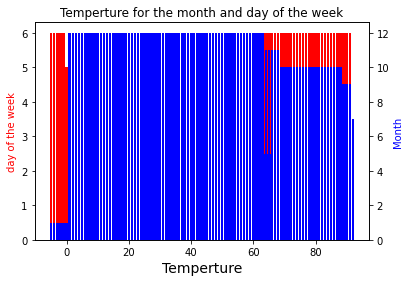

In [21]:
# question 3 plot the training temperture data over time 

fig,ax = plt.subplots()
plt.title('Temperture for the month and day of the week')

ax.bar(train.Temp, train.day_of_week , color="red")
ax.set_xlabel("Temperture", fontsize=14)
ax.set_ylabel("day of the week", color = "red",fontsize=10)
ax2=ax.twinx() # this allows us to create a second axis 
ax2.bar(train.Temp, train.month, color= "blue")
ax2.set_ylabel("Month", color='blue', fontsize=10)
#plt.tight_layout()
plt.show()

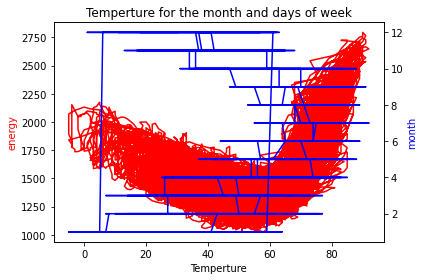

In [23]:
#question 4 plot one week of trainging temperture data
#sns.lineplot(x='month', y='Temp', data=train)

fig, ax = plt.subplots()
plt.title('Temperture for the month and days of week')
ax.plot(train.Temp, train.mw, color='red')
ax.set_xlabel("Temperture", fontsize=10)
ax.set_ylabel("energy", color="red", fontsize=10)
ax2 = ax.twinx()
ax2.plot(train.Temp, train.month, color = "blue")
ax2.set_ylabel("month", color = "blue", fontsize=10)
plt.tight_layout()
plt.show()

In [24]:
#question 5 calculate the corrlation between the temperture and energy data 
# Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
from scipy.stats import pearsonr

data1 = train['Temp']
data2 = train['mw']
#calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
 


Pearsons correlation: 0.328


the corrlation between the two variables temperture and energy are low correlation 


<AxesSubplot:xlabel='Temp', ylabel='mw'>

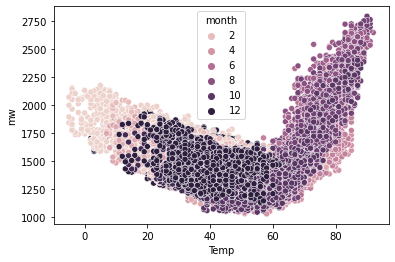

In [27]:
# question 6 plot a scatter plot between temperture and energy 

# making a scatter plot to see what patterns we might have 
sns.scatterplot(data=train, x="Temp", y="mw", hue='month')